# Tarea 2: Comparación de modelos

### Marcelino Sánchez Rodríguez
### 6 de marzo de 2023

In [2]:
# Load necessary packages
library(rstan)
library(coda)
library(R2jags)
library(methods)

# set the working directory

setwd("/home/rstudio/tarea2RegAvanz")

#--- Funciones utiles ---
prob<-function(x){
  out<-min(length(x[x>0])/length(x),length(x[x<0])/length(x))
  out
}

In [41]:
source("/home/rstudio/tarea2RegAvanz/claseNieto.R")


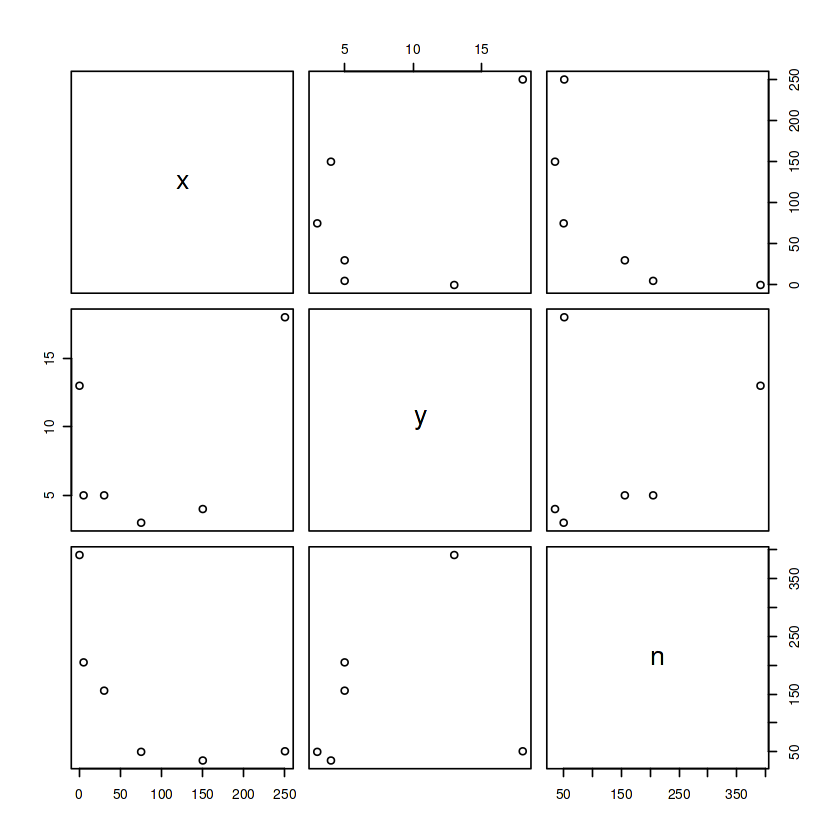

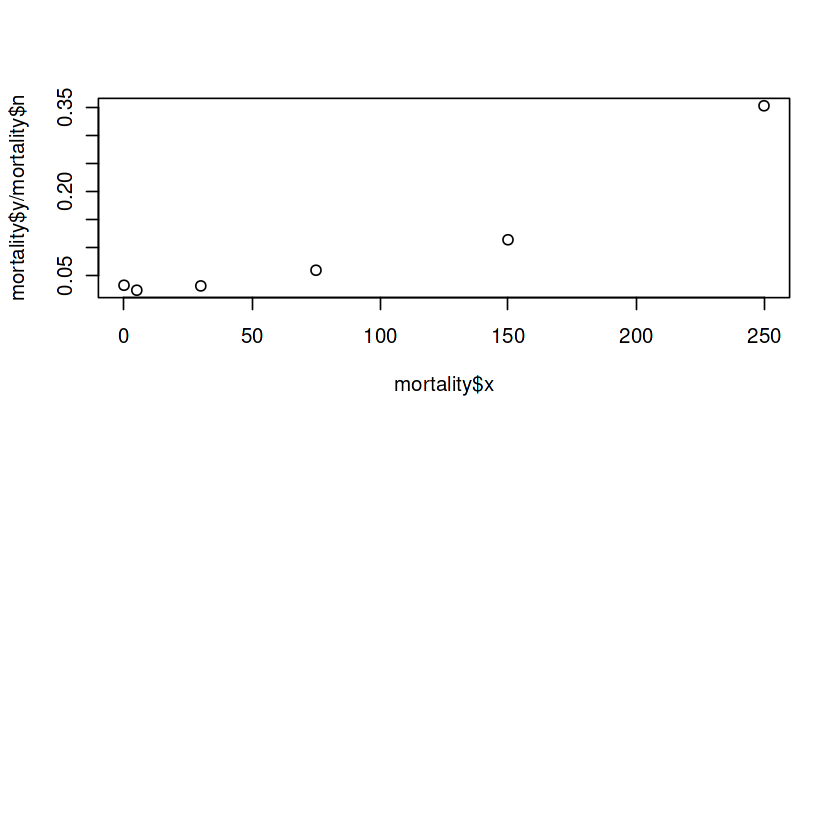

In [28]:
mortality<-read.table("http://gente.itam.mx/lnieto/index_archivos/mortality.txt",header=TRUE)
n<-nrow(mortality)

#creamos gráficas de los datos de mortalidad
par(mfrow = c(2, 1))
plot(mortality)
plot(mortality$x,mortality$y/mortality$n)
m<-1
nef<-c(100)
xf<-c(200)

In [16]:
#-Defining data-
data<-list("n"=n,"ne"=mortality$n,"y"=mortality$y,"x"=mortality$x,"m"=m,"nef"=nef,"xf"=xf)
data2<-list("n"=n,"y"=mortality$y/mortality$n,"x"=mortality$x,"m"=m,"xf"=xf)

#-Defining inits-
inits<-function(){list(beta=rep(0,2),yf1=rep(1,n),yf2=1)}
inits2<-function(){list(beta=rep(0,2),phy=1,yf1=rep(1,n),yf2=1)}

#-Selecting parameters to monitor-
parsa<-c("beta","lambda","yf1","yf2")
parsbc<-c("beta","p","yf1","yf2")
parsd<-c("beta","phy","yf1","yf2")

## Primer modelo

Modelo

$y_{i}|\mu_{i} \sim \text{Poisson}(\mu_{i})$

Relación

$\mu_{i}=\text{n}_{i}\lambda_{i}$

Liga

$\text{log}(\lambda_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [42]:
#corremos código
modelCode1 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dpois(mu[i])
	mu[i]<-ne[i]*lambda[i]
	log(lambda[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dpois(mu[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dpois(muf[i]) 
#	muf[i]<-nef[i]*lambdaf[i]
#	log(lambdaf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dpois(muf) 
	muf<-nef*lambdaf
	log(lambdaf)<-beta[1]+beta[2]*xf

}'

#modelText <- textConnection(modelCode1)

ej5a.sim <- new("jagsModel", data = data, inits = inits, parms = parsa, model.fileText = modelCode1)

#ej5a.sim<-jags(data,inits,parsa,model.file=modelText,
#              n.iter=50000,n.chains=2,n.burnin=5000,n.thin=1)

runJagsModel(ej5a.sim)

Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model

[1] "Ha terminado de crear la cadena"


An object of class "jagsModel"
Slot "data":
$n
[1] 6

$ne
[1] 391 205 156  50  35  51

$y
[1] 13  5  5  3  4 18

$x
[1]   0   5  30  75 150 250

$m
[1] 1

$nef
[1] 100

$xf
[1] 200


Slot "inits":
function(){list(beta=rep(0,2),yf1=rep(1,n),yf2=1)}
<bytecode: 0x40378dd8a0>

Slot "parms":
[1] "beta"   "lambda" "yf1"    "yf2"   

Slot "model.fileText":
[1] "model\n{\n#Likelihood\nfor (i in 1:n) {\n\ty[i] ~ dpois(mu[i])\n\tmu[i]<-ne[i]*lambda[i]\n\tlog(lambda[i])<-beta[1]+beta[2]*x[i]\n\t}\n#Priors \nfor (j in 1:2) { beta[j] ~ dnorm(0,0.001) }\n#Prediction 1\nfor (i in 1:n) { yf1[i] ~ dpois(mu[i]) }\n#Prediction 2\n#for (i in 1:m) { \n#\tyf2[i] ~ dpois(muf[i]) \n#\tmuf[i]<-nef[i]*lambdaf[i]\n#\tlog(lambdaf[i])<-beta[1]+beta[2]*xf[i]\n#}\n\tyf2 ~ dpois(muf) \n\tmuf<-nef*lambdaf\n\tlog(lambdaf)<-beta[1]+beta[2]*xf\n\n}"

Slot "n.iter":
[1] 5000

Slot "n.chains":
[1] 2

Slot "n.burnin":
[1] 500

Slot "n.thin":
[1] 1

Slot "modelSim":
Inference for Bugs model at "8", fit using jags,
 2 chains,

In [46]:
print(ej5a.sim@dicModel)


NULL


## Verificamos convergencia

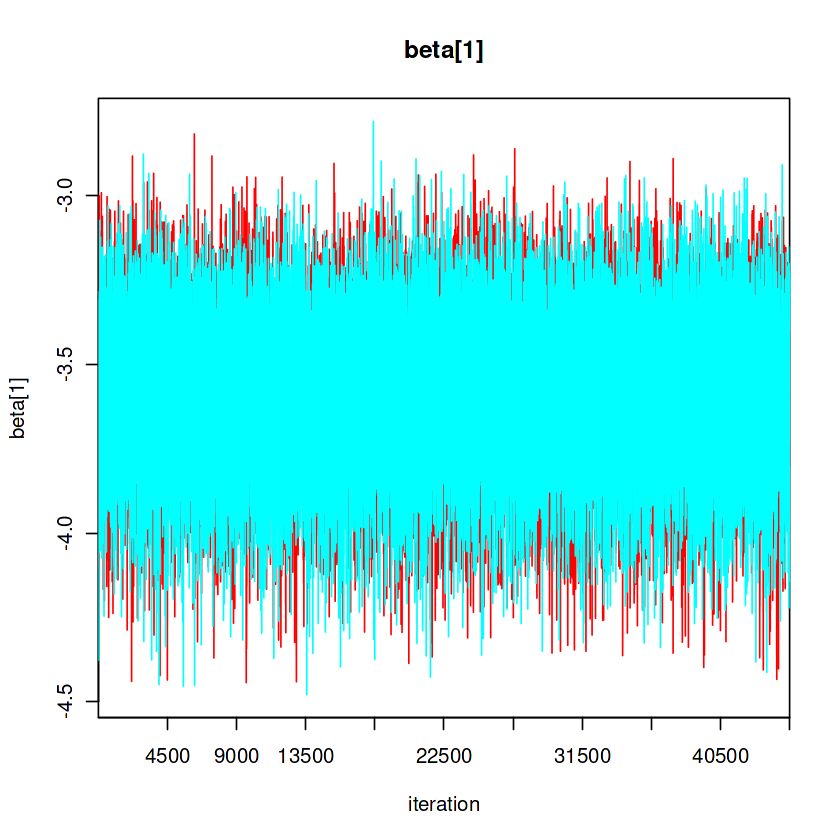

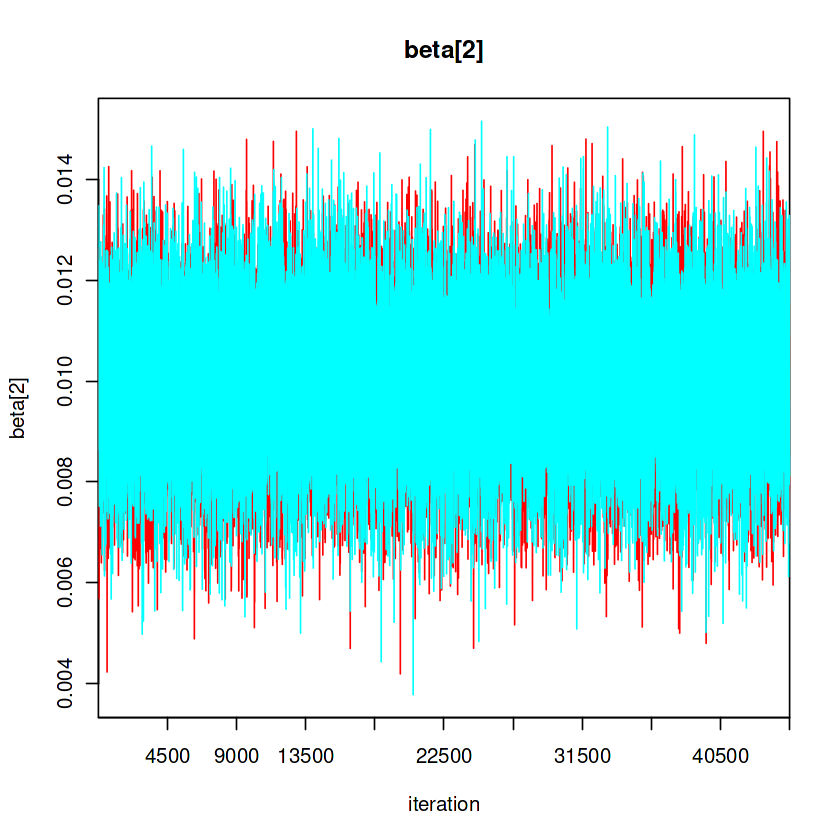

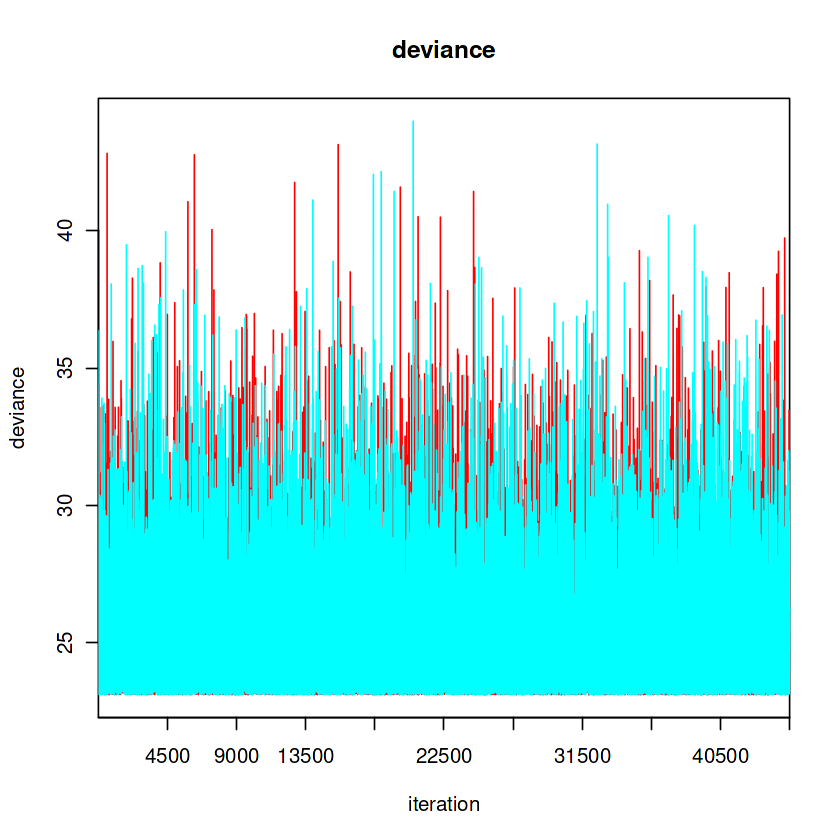

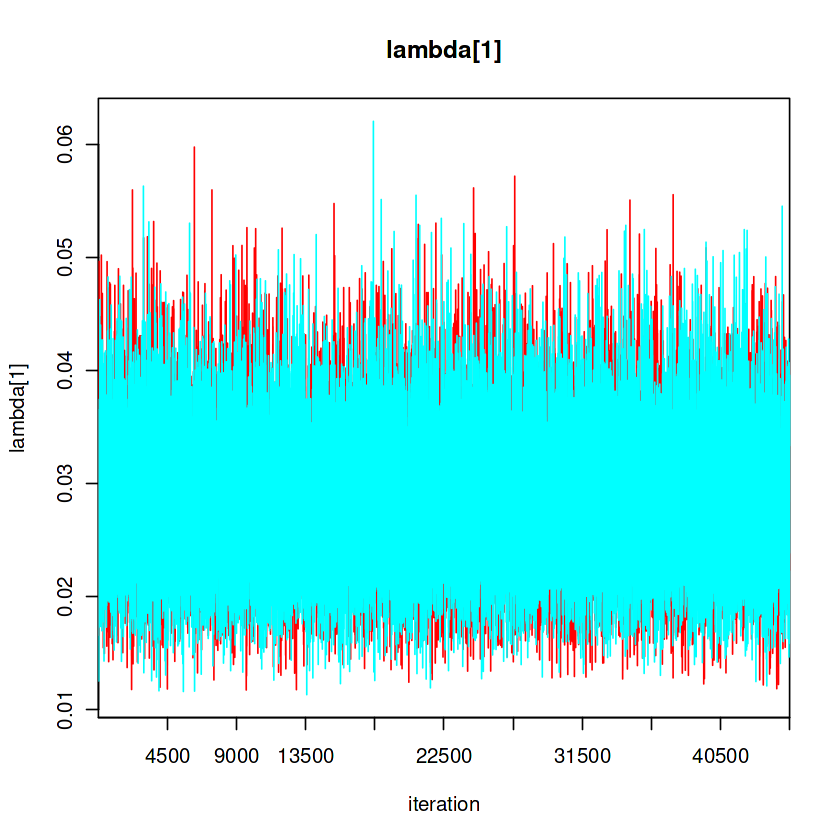

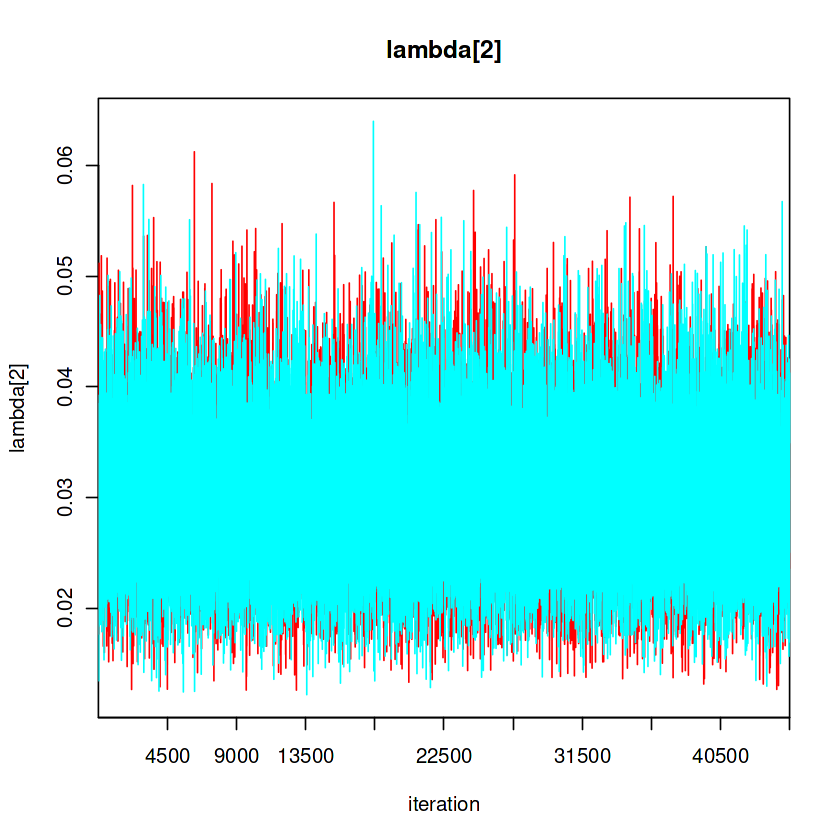

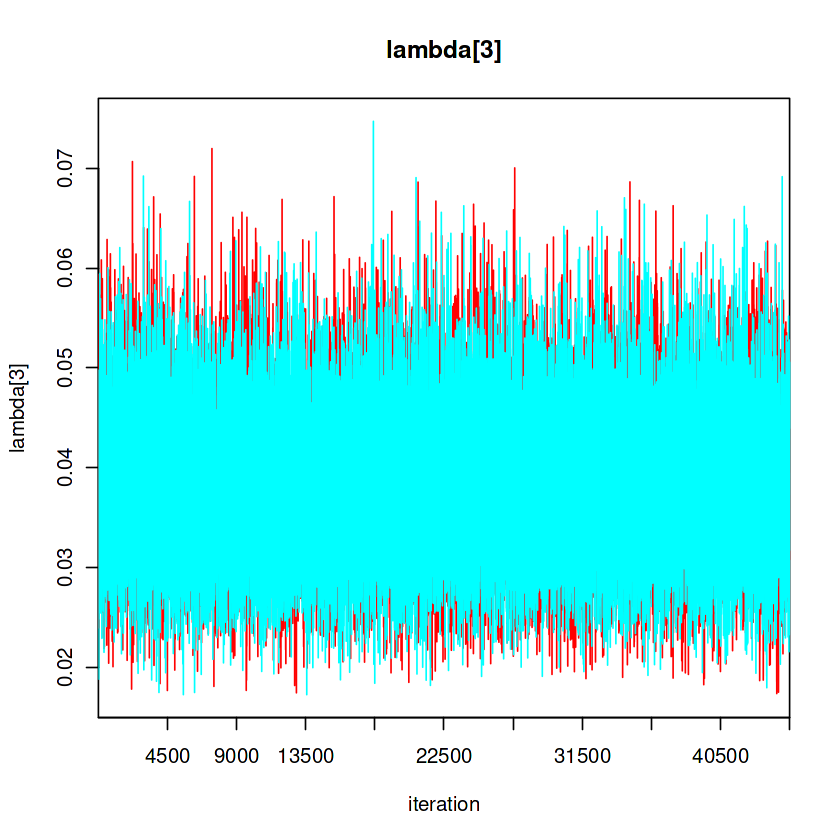

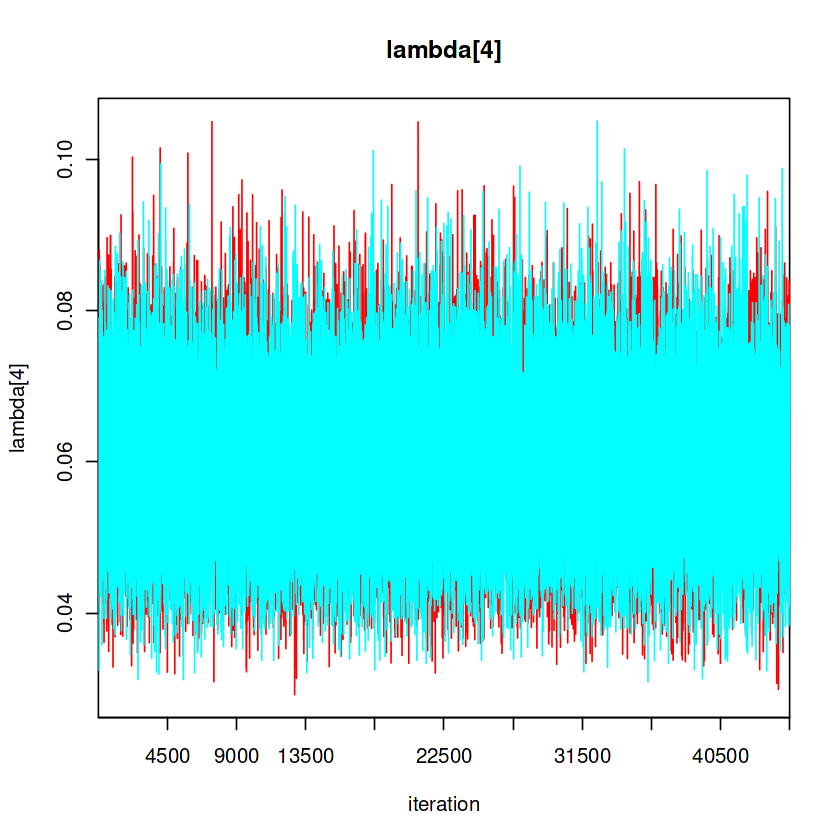

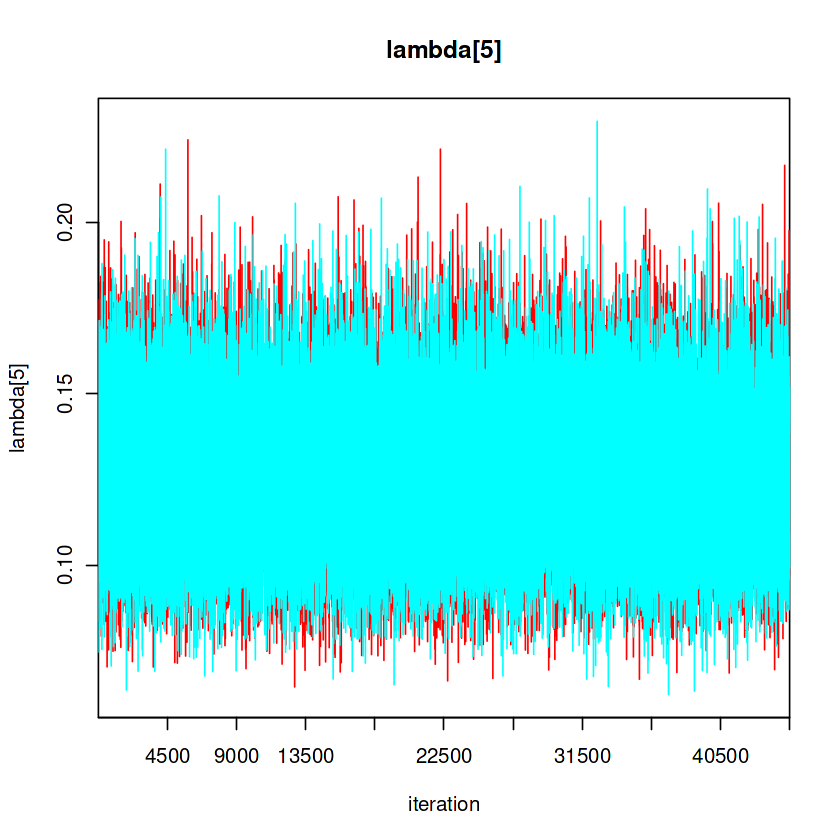

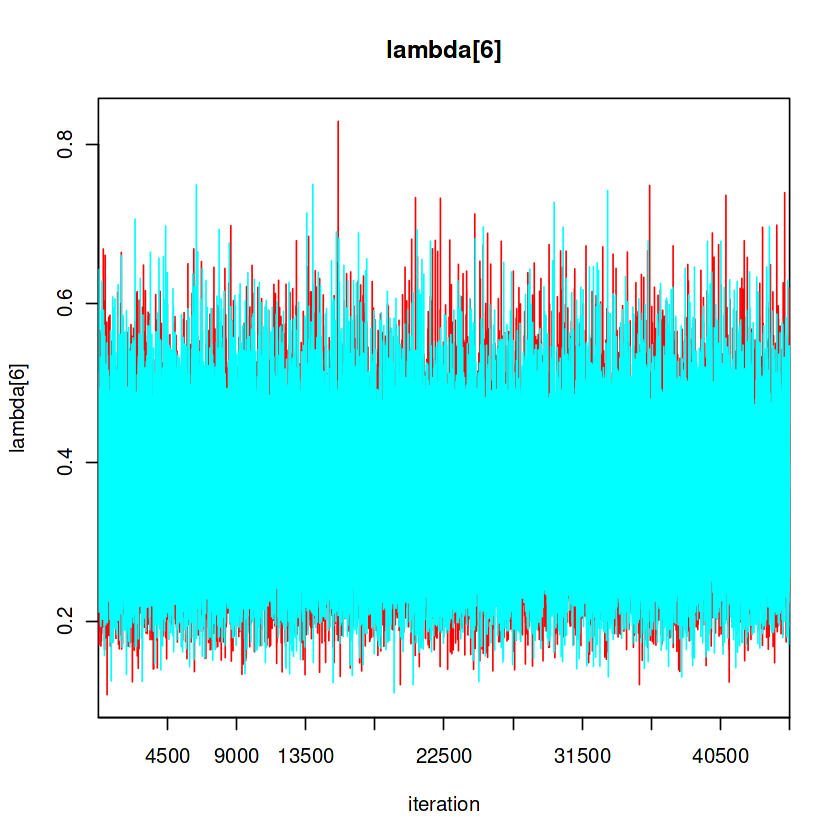

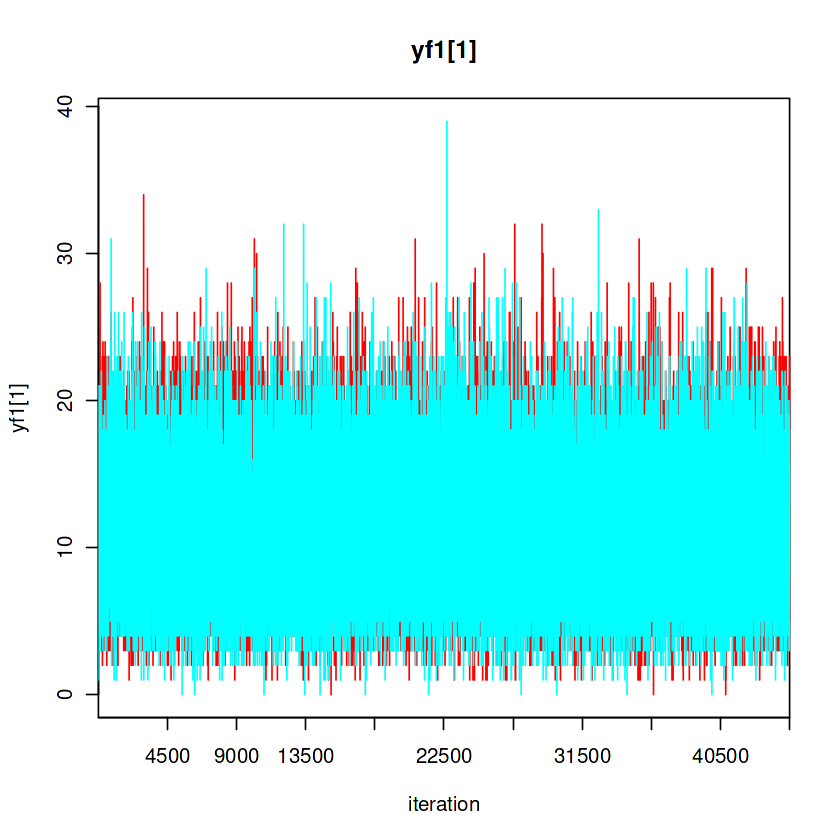

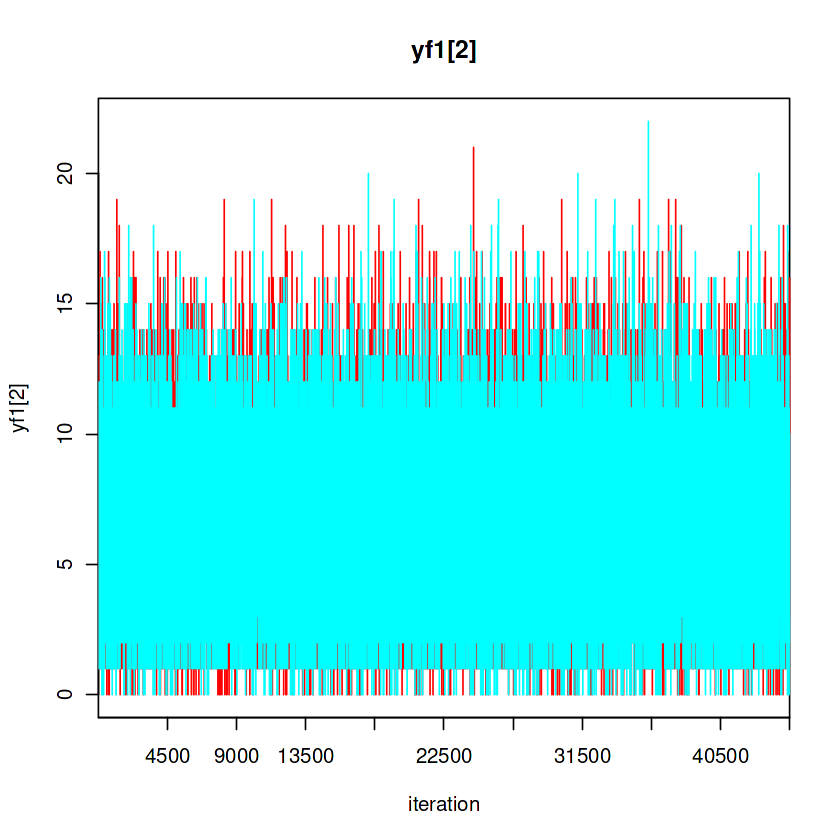

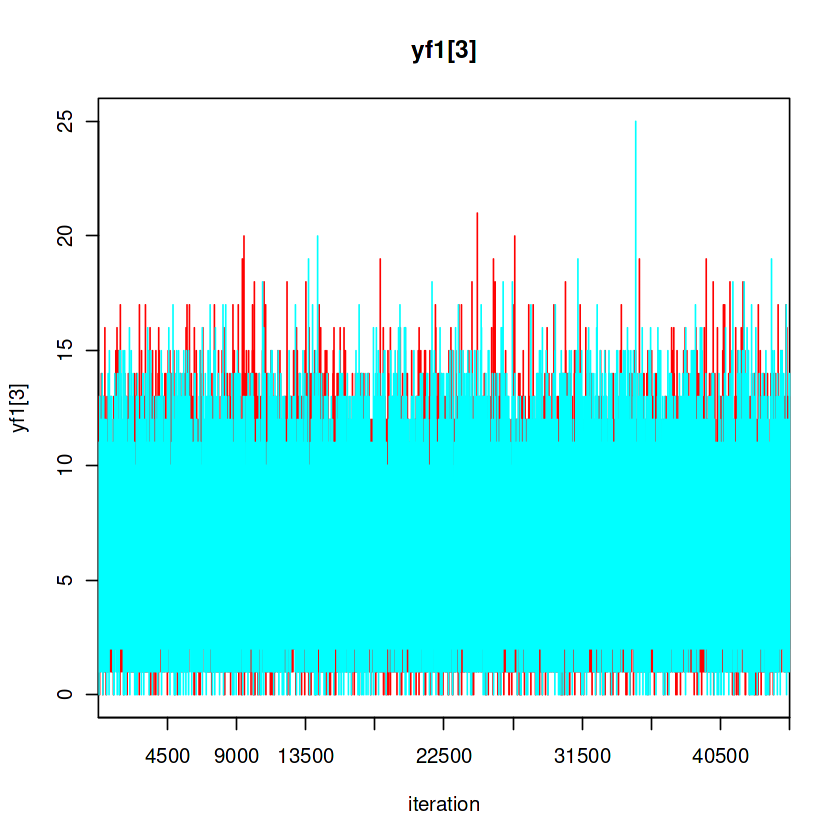

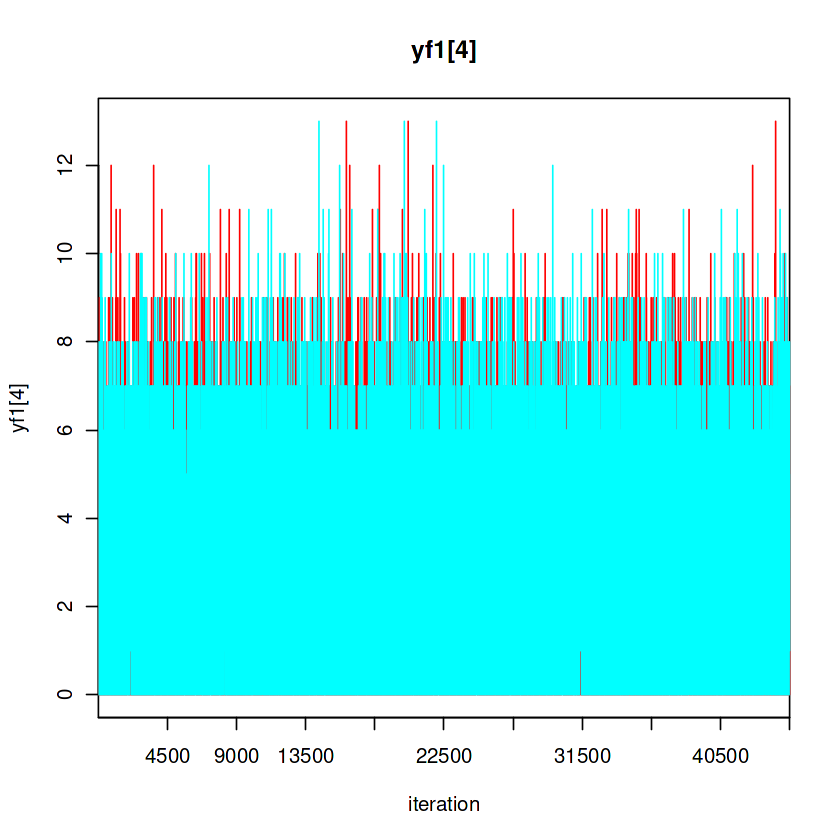

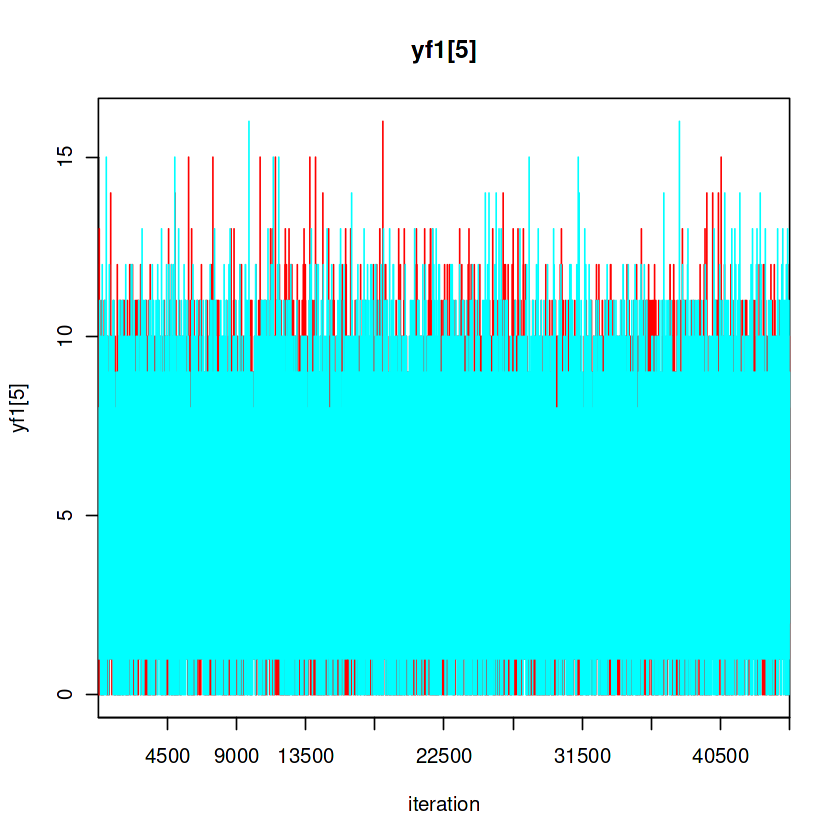

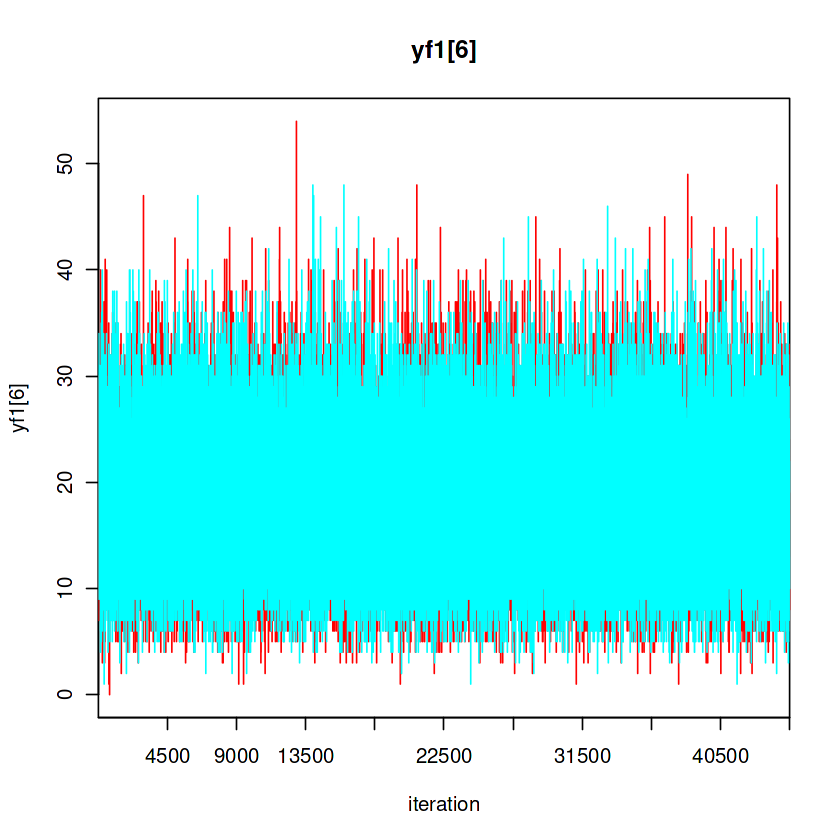

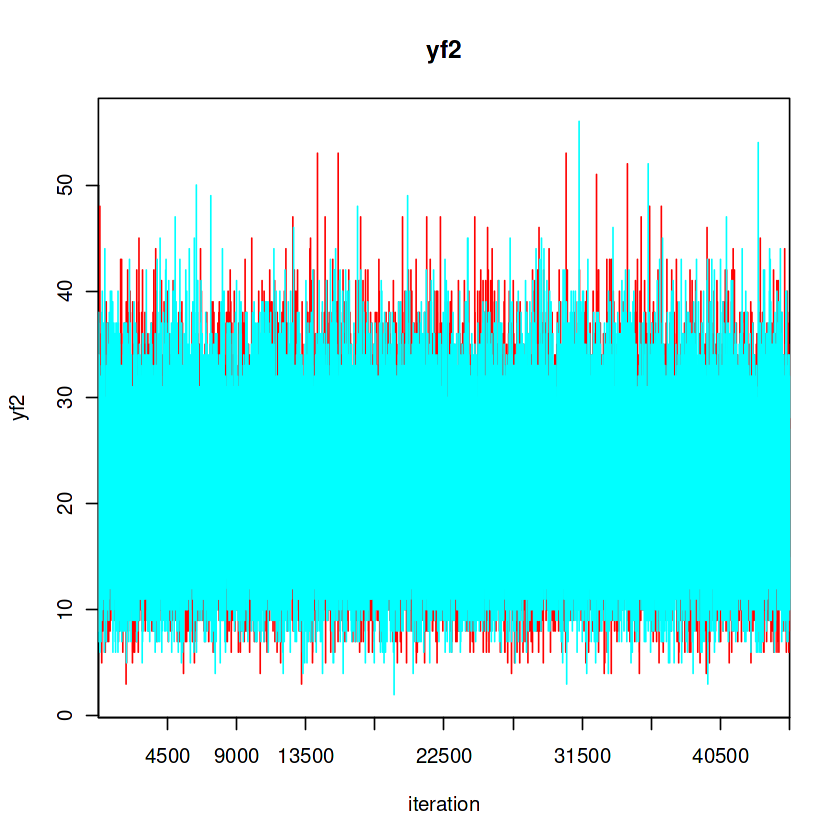

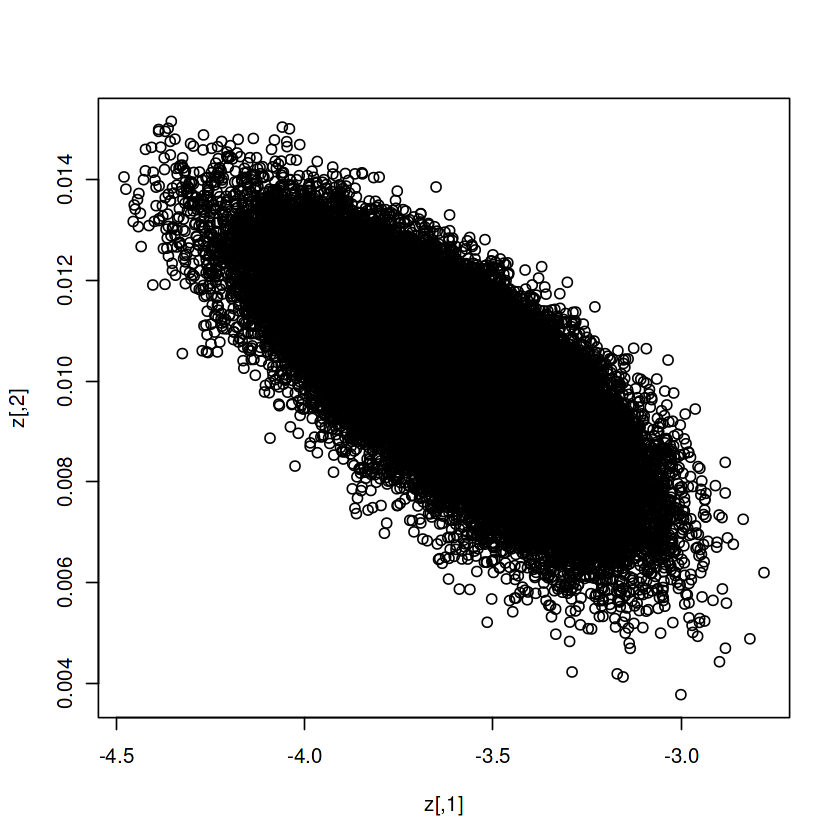

ERROR: Error in match.fun(FUN): object 'prob' not found


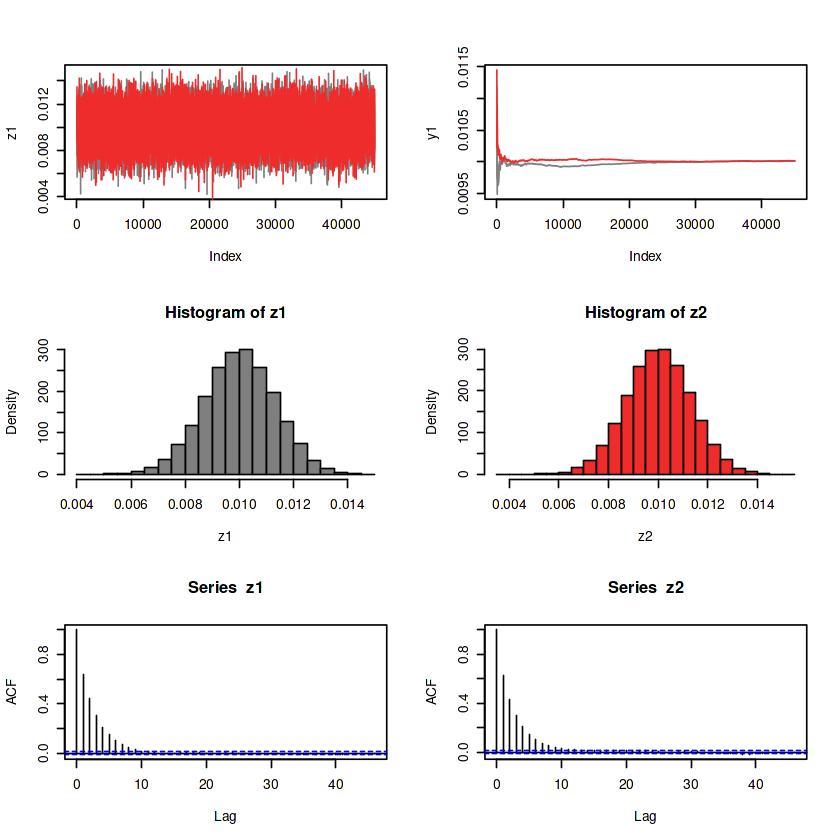

In [11]:


#z<-out$beta
#par(mfrow=c(1,1))
#plot(z)

#Multiples cadenas

#OpenBUGS
#out.a<-ej5.sim$sims.array

#JAGS
out.a<-ej5.sim$BUGSoutput$sims.array

z1<-out.a[,1,2]
z2<-out.a[,2,2]
par(mfrow=c(3,2))
plot(z1,type="l",col="grey50")
lines(z2,col="firebrick2")
y1<-cumsum(z1)/(1:length(z1))
y2<-cumsum(z2)/(1:length(z2))
ymin<-min(y1,y2)
ymax<-max(y1,y2)
plot(y1,type="l",col="grey50",ylim=c(ymin,ymax))
lines(y2,col="firebrick2",ylim=c(ymin,ymax))
hist(z1,freq=FALSE,col="grey50")
hist(z2,freq=FALSE,col="firebrick2")
acf(z1)
acf(z2)

#Resumen (estimadores)
#OpenBUGS
#out.sum<-ej5.sim$summary

#JAGS
out.sum<-ej5.sim$BUGSoutput$summary

#Tabla resumen
out.sum.t<-out.sum[grep("beta",rownames(out.sum)),c(1,3,7)]
out.sum.t<-cbind(out.sum.t,apply(out$beta,2,prob))
dimnames(out.sum.t)[[2]][4]<-"prob"
print(out.sum.t)

## AGREGAR FUNCIÓN PROB DE NIETO

#DIC
out.dic<-ej5c.sim$DIC
out.dic<-ej5.sim$BUGSoutput$DIC
print(out.dic)


## Checamos intervalos de predicción

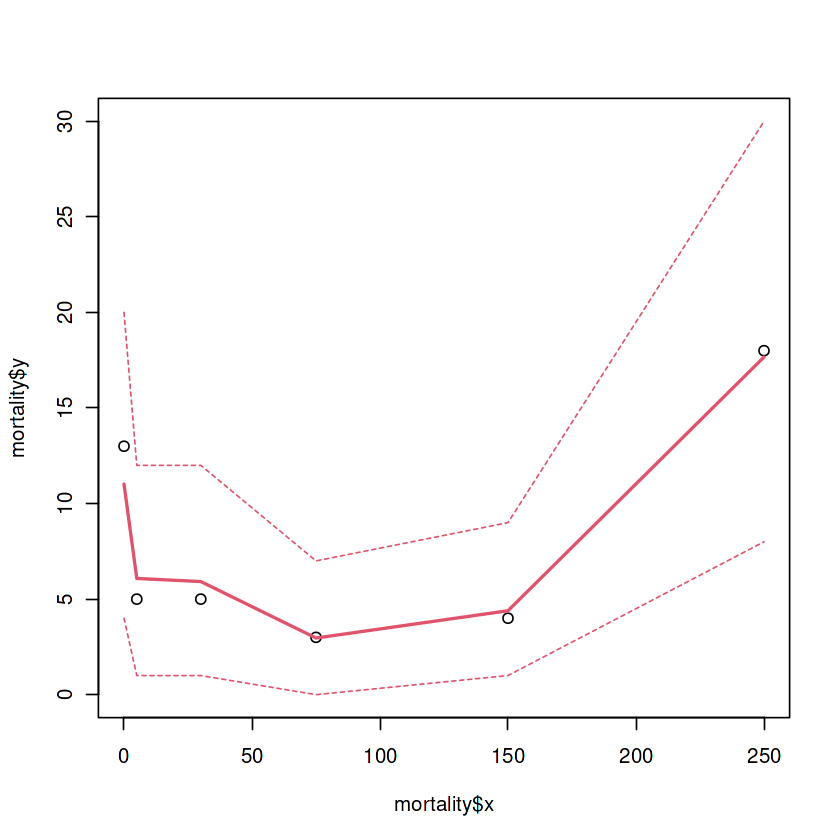

In [12]:
out.yf1<-out.sum[grep("yf1",rownames(out.sum)),]
or<-order(mortality$x)
ymin<-min(mortality$y,out.yf[,c(1,3,7)])
ymax<-max(mortality$y,out.yf[,c(1,3,7)])

par(mfrow=c(1,1))
plot(mortality$x,mortality$y,ylim=c(ymin,ymax))

#Modelo 1
lines(mortality$x[or],out.yf1[or,1],lwd=2,col=2)
lines(mortality$x[or],out.yf1[or,3],lty=2,col=2)
lines(mortality$x[or],out.yf1[or,7],lty=2,col=2)

## Segundo modelo (logística)

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [10]:
#corremos código
modelCode2 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

modelCode2 <- textConnection(modelCode2)

ej5b.sim<-jags(data,inits,parsbc,model.file=modelCode2,
               n.iter=50000,n.chains=2,n.burnin=5000,n.thin=1)




Warning message in jags.model(model.file, data = data, inits = init.values, n.chains = n.chains, :
“Unused variable "m" in data”


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 6
   Unobserved stochastic nodes: 9
   Total graph size: 60

Initializing model



## Verificamos convergencia

ERROR: Error in match.fun(FUN): object 'prob' not found


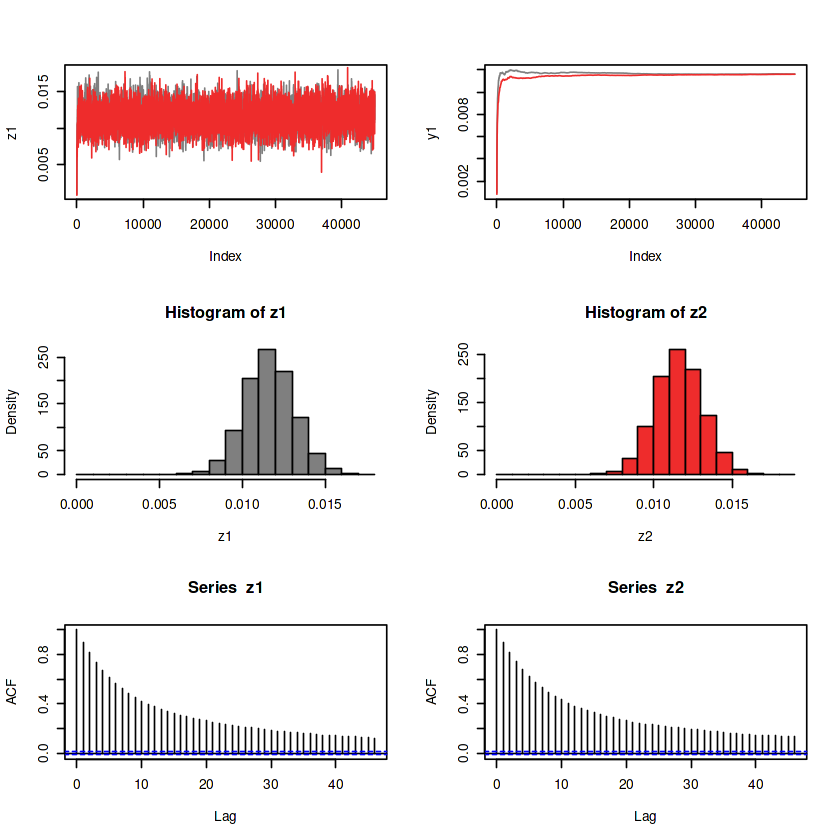

In [13]:
#-Monitoring chain-
ej5.sim<-ej5b.sim

#Traza de la cadena
#traceplot(ej5.sim)

#Cadena

#OpenBUGS
#out<-ej5.sim$sims.list

#JAGS
out<-ej5.sim$BUGSoutput$sims.list

#z<-out$beta
#par(mfrow=c(1,1))
#plot(z)

#Multiples cadenas

#OpenBUGS
#out.a<-ej5.sim$sims.array

#JAGS
out.a<-ej5.sim$BUGSoutput$sims.array

z1<-out.a[,1,2]
z2<-out.a[,2,2]
par(mfrow=c(3,2))
plot(z1,type="l",col="grey50")
lines(z2,col="firebrick2")
y1<-cumsum(z1)/(1:length(z1))
y2<-cumsum(z2)/(1:length(z2))
ymin<-min(y1,y2)
ymax<-max(y1,y2)
plot(y1,type="l",col="grey50",ylim=c(ymin,ymax))
lines(y2,col="firebrick2",ylim=c(ymin,ymax))
hist(z1,freq=FALSE,col="grey50")
hist(z2,freq=FALSE,col="firebrick2")
acf(z1)
acf(z2)

#Resumen (estimadores)
#OpenBUGS
#out.sum<-ej5.sim$summary

#JAGS
out.sum<-ej5.sim$BUGSoutput$summary

#Tabla resumen
out.sum.t<-out.sum[grep("beta",rownames(out.sum)),c(1,3,7)]
out.sum.t<-cbind(out.sum.t,apply(out$beta,2,prob))
dimnames(out.sum.t)[[2]][4]<-"prob"
print(out.sum.t)

#DIC
out.dic<-ej5c.sim$DIC
out.dic<-ej5.sim$BUGSoutput$DIC
print(out.dic)


## Checamos intervalos de predicción

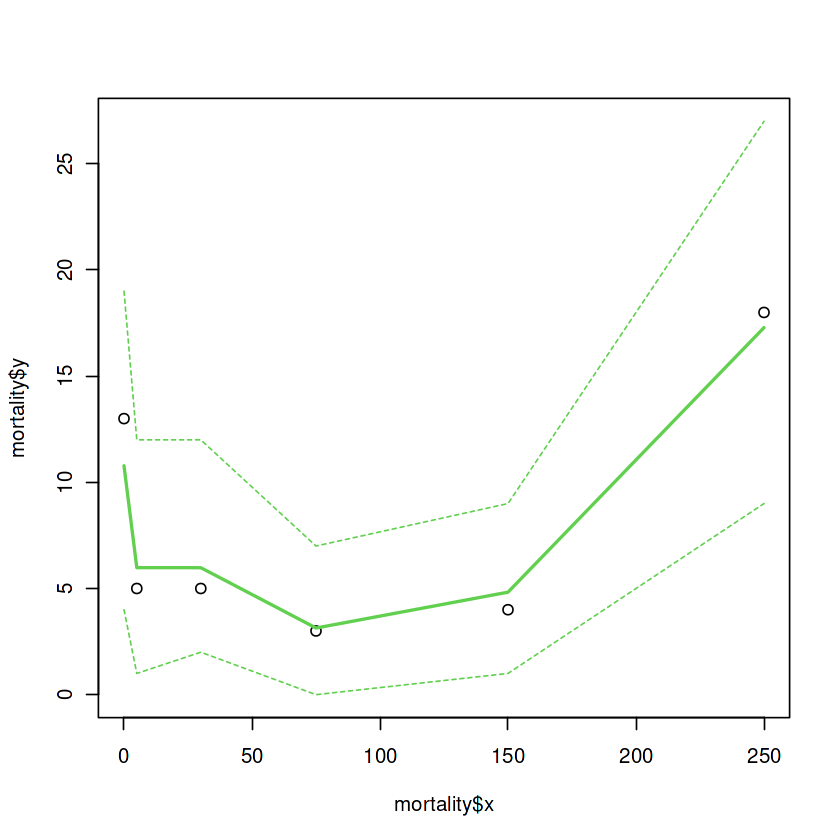

In [16]:
#Predictions
out.yf2<-out.sum[grep("yf1",rownames(out.sum)),]
or<-order(mortality$x)
ymin<-min(mortality$y,out.yf[,c(1,3,7)])
ymax<-max(mortality$y,out.yf[,c(1,3,7)])

par(mfrow=c(1,1))
plot(mortality$x,mortality$y,ylim=c(ymin,ymax))
#Modelo 1
lines(mortality$x[or],out.yf[or,1],lwd=2,col=2)
lines(mortality$x[or],out.yf[or,3],lty=2,col=2)
lines(mortality$x[or],out.yf[or,7],lty=2,col=2)
#Modelo 2
lines(mortality$x[or],out.yf2[or,1],lwd=2,col=3)
lines(mortality$x[or],out.yf2[or,3],lty=2,col=3)
lines(mortality$x[or],out.yf2[or,7],lty=2,col=3)

## Tercer modelo (probit)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode3 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

modelCode3 <- textConnection(modelCode3)

ej5b.sim3<-jags(data,inits,parsbc,model.file=modelCode3,
               n.iter=50000,n.chains=2,n.burnin=5000,n.thin=1)



## Verificamos convergencia

In [ ]:
#-Monitoring chain-
ej5.sim<-ej5b.sim3

#Traza de la cadena
#traceplot(ej5.sim)

#Cadena

#OpenBUGS
#out<-ej5.sim$sims.list

#JAGS
out<-ej5.sim$BUGSoutput$sims.list

#z<-out$beta
#par(mfrow=c(1,1))
#plot(z)

#Multiples cadenas

#OpenBUGS
#out.a<-ej5.sim$sims.array

#JAGS
out.a<-ej5.sim$BUGSoutput$sims.array

z1<-out.a[,1,2]
z2<-out.a[,2,2]
par(mfrow=c(3,2))
plot(z1,type="l",col="grey50")
lines(z2,col="firebrick2")
y1<-cumsum(z1)/(1:length(z1))
y2<-cumsum(z2)/(1:length(z2))
ymin<-min(y1,y2)
ymax<-max(y1,y2)
plot(y1,type="l",col="grey50",ylim=c(ymin,ymax))
lines(y2,col="firebrick2",ylim=c(ymin,ymax))
hist(z1,freq=FALSE,col="grey50")
hist(z2,freq=FALSE,col="firebrick2")
acf(z1)
acf(z2)

#Resumen (estimadores)
#OpenBUGS
#out.sum<-ej5.sim$summary

#JAGS
out.sum<-ej5.sim$BUGSoutput$summary

#Tabla resumen
out.sum.t<-out.sum[grep("beta",rownames(out.sum)),c(1,3,7)]
out.sum.t<-cbind(out.sum.t,apply(out$beta,2,prob))
dimnames(out.sum.t)[[2]][4]<-"prob"
print(out.sum.t)

#DIC
out.dic<-ej5c.sim$DIC
out.dic<-ej5.sim$BUGSoutput$DIC
print(out.dic)


## Checamos intervalos de predicción

In [ ]:
#Predictions
out.yf3<-out.sum[grep("yf1",rownames(out.sum)),]
or<-order(mortality$x)
ymin<-min(mortality$y,out.yf[,c(1,3,7)])
ymax<-max(mortality$y,out.yf[,c(1,3,7)])

par(mfrow=c(1,1))
plot(mortality$x,mortality$y,ylim=c(ymin,ymax))
#Modelo 1
lines(mortality$x[or],out.yf[or,1],lwd=2,col=2)
lines(mortality$x[or],out.yf[or,3],lty=2,col=2)
lines(mortality$x[or],out.yf[or,7],lty=2,col=2)
#Modelo 2
lines(mortality$x[or],out.yf2[or,1],lwd=2,col=3)
lines(mortality$x[or],out.yf2[or,3],lty=2,col=3)
lines(mortality$x[or],out.yf2[or,7],lty=2,col=3)
#Modelo 3
lines(mortality$x[or],out.yf3[or,1],lwd=2,col=4)
lines(mortality$x[or],out.yf3[or,3],lty=2,col=4)
lines(mortality$x[or],out.yf3[or,7],lty=2,col=4)

## Cuarto modelo (log-log)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode4 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
	eta[i]<-beta[1]+beta[2]*x[i]
	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
#	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

modelCode4 <- textConnection(modelCode4)

ej5b.sim4<-jags(data,inits,parsbc,model.file=modelCode4,
               n.iter=50000,n.chains=2,n.burnin=5000,n.thin=1)



## Checamos convergencia

In [ ]:
#-Monitoring chain-
ej5.sim<-ej5b.sim4

#Traza de la cadena
#traceplot(ej5.sim)

#Cadena

#OpenBUGS
#out<-ej5.sim$sims.list

#JAGS
out<-ej5.sim$BUGSoutput$sims.list

#z<-out$beta
#par(mfrow=c(1,1))
#plot(z)

#Multiples cadenas

#OpenBUGS
#out.a<-ej5.sim$sims.array

#JAGS
out.a<-ej5.sim$BUGSoutput$sims.array

z1<-out.a[,1,2]
z2<-out.a[,2,2]
par(mfrow=c(3,2))
plot(z1,type="l",col="grey50")
lines(z2,col="firebrick2")
y1<-cumsum(z1)/(1:length(z1))
y2<-cumsum(z2)/(1:length(z2))
ymin<-min(y1,y2)
ymax<-max(y1,y2)
plot(y1,type="l",col="grey50",ylim=c(ymin,ymax))
lines(y2,col="firebrick2",ylim=c(ymin,ymax))
hist(z1,freq=FALSE,col="grey50")
hist(z2,freq=FALSE,col="firebrick2")
acf(z1)
acf(z2)

#Resumen (estimadores)
#OpenBUGS
#out.sum<-ej5.sim$summary

#JAGS
out.sum<-ej5.sim$BUGSoutput$summary

#Tabla resumen
out.sum.t<-out.sum[grep("beta",rownames(out.sum)),c(1,3,7)]
out.sum.t<-cbind(out.sum.t,apply(out$beta,2,prob))
dimnames(out.sum.t)[[2]][4]<-"prob"
print(out.sum.t)

#DIC
out.dic<-ej5c.sim$DIC
out.dic<-ej5.sim$BUGSoutput$DIC
print(out.dic)


## Checamos intervalos de predicción

In [ ]:
#Predictions
out.yf4<-out.sum[grep("yf1",rownames(out.sum)),]
or<-order(mortality$x)
ymin<-min(mortality$y,out.yf[,c(1,3,7)])
ymax<-max(mortality$y,out.yf[,c(1,3,7)])

par(mfrow=c(1,1))
plot(mortality$x,mortality$y,ylim=c(ymin,ymax))
#Modelo 1
lines(mortality$x[or],out.yf[or,1],lwd=2,col=2)
lines(mortality$x[or],out.yf[or,3],lty=2,col=2)
lines(mortality$x[or],out.yf[or,7],lty=2,col=2)
#Modelo 2
lines(mortality$x[or],out.yf2[or,1],lwd=2,col=3)
lines(mortality$x[or],out.yf2[or,3],lty=2,col=3)
lines(mortality$x[or],out.yf2[or,7],lty=2,col=3)
#Modelo 3
lines(mortality$x[or],out.yf3[or,1],lwd=2,col=4)
lines(mortality$x[or],out.yf3[or,3],lty=2,col=4)
lines(mortality$x[or],out.yf3[or,7],lty=2,col=4)
#Modelo 4
lines(mortality$x[or],out.yf4[or,1],lwd=2,col=5)
lines(mortality$x[or],out.yf4[or,3],lty=2,col=5)
lines(mortality$x[or],out.yf4[or,7],lty=2,col=5)

## Quinto modelo (clog-log)

CHECAR

Modelo

$y_{i}|\mu_{i} \sim \text{Bin}(\text{n}_{i},\text{p}_{i})$

Relación

$\mu_{i}=\text{n}_{i}\text{p}_{i}$

Liga logística

$\text{logit}(\text{p}_{i})=\beta_{1}+\beta_{2}*x_{i}$

Priors

$\beta_{j} \sim \text{Norm}(0,0.001)$

In [ ]:
#corremos código
modelCode5 <- 'model
{
#Likelihood
for (i in 1:n) {
	y[i] ~ dbin(p[i],ne[i])
	mu[i]<-ne[i]*p[i]
#Liga logistica
#	logit(p[i])<-beta[1]+beta[2]*x[i]
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(eta[i])/(1+exp(eta[i]))
#Liga probit
#	p[i]<-phi(beta[1]+beta[2]*x[i])
#Liga log-log
#	eta[i]<-beta[1]+beta[2]*x[i]
#	p[i]<-exp(-exp(eta[i]))
#Liga clog-log
	cloglog(p[i])<-beta[1]+beta[2]*x[i]
	}
#Priors 
for (j in 1:2) { beta[j] ~ dnorm(0,0.001) }
#Prediction 1
for (i in 1:n) { yf1[i] ~ dbin(p[i],ne[i]) }
#Prediction 2
#for (i in 1:m) { 
#	yf2[i] ~ dbin(pf[i],nef[i]) 
#	muf[i]<-nef[i]*pf[i]
#	logit(pf[i])<-beta[1]+beta[2]*xf[i]
#}
	yf2 ~ dbin(pf,nef) 
	muf<-nef*pf
#	logit(pf)<-beta[1]+beta[2]*xf
#	pf<-phi(beta[1]+beta[2]*xf)
#	etaf<-beta[1]+beta[2]*xf
#	pf<-exp(-exp(etaf))
	cloglog(pf)<-beta[1]+beta[2]*xf	
}'

modelCode5 <- textConnection(modelCode5)

ej5b.sim5<-jags(data,inits,parsbc,model.file=modelCode5,
               n.iter=50000,n.chains=2,n.burnin=5000,n.thin=1)



## Corremos el modelo

In [ ]:
#-Monitoring chain-
ej5.sim<-ej5b.sim5

#Traza de la cadena
#traceplot(ej5.sim)

#Cadena

#OpenBUGS
#out<-ej5.sim$sims.list

#JAGS
out<-ej5.sim$BUGSoutput$sims.list

#z<-out$beta
#par(mfrow=c(1,1))
#plot(z)

#Multiples cadenas

#OpenBUGS
#out.a<-ej5.sim$sims.array

#JAGS
out.a<-ej5.sim$BUGSoutput$sims.array

z1<-out.a[,1,2]
z2<-out.a[,2,2]
par(mfrow=c(3,2))
plot(z1,type="l",col="grey50")
lines(z2,col="firebrick2")
y1<-cumsum(z1)/(1:length(z1))
y2<-cumsum(z2)/(1:length(z2))
ymin<-min(y1,y2)
ymax<-max(y1,y2)
plot(y1,type="l",col="grey50",ylim=c(ymin,ymax))
lines(y2,col="firebrick2",ylim=c(ymin,ymax))
hist(z1,freq=FALSE,col="grey50")
hist(z2,freq=FALSE,col="firebrick2")
acf(z1)
acf(z2)

#Resumen (estimadores)
#OpenBUGS
#out.sum<-ej5.sim$summary

#JAGS
out.sum<-ej5.sim$BUGSoutput$summary

#Tabla resumen
out.sum.t<-out.sum[grep("beta",rownames(out.sum)),c(1,3,7)]
out.sum.t<-cbind(out.sum.t,apply(out$beta,2,prob))
dimnames(out.sum.t)[[2]][4]<-"prob"
print(out.sum.t)

#DIC
out.dic<-ej5c.sim$DIC
out.dic<-ej5.sim$BUGSoutput$DIC
print(out.dic)
